## Objective

Build a CLI-based Job Analytics Tool that: 
• Loads and cleans job listing data 
• Performs filtering and statistical analysis 
• Generates visual insights and exports reports

## Week 1 

In [4]:
import pandas as pd

## 1. Load data using pandas.read_csv()

In [5]:

data = pd.read_csv('C://Users//ADMIN//Salary_Data_Based_country_and_race.csv')


In [6]:
data

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [7]:
df=pd.DataFrame(data)

In [8]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [9]:
df.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


In [10]:
# info() Method 
# number of rows and columns
# colunmn name
# int64 float64 object 
# non null counts
# memory usage of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [11]:
data.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


## 2. Handle missing/null values (fillna, dropna)

In [12]:
data.fillna(value=0, inplace=True)

In [13]:
# Remove columns with NaN values:
data.dropna(axis=1, inplace=True)

## 3.Convert date strings to datetime format

In [14]:
df['Years of Experience'] = pd.to_datetime(df['Years of Experience'], errors='coerce')

## 4. Normalize column names and trim whitespaces

In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

## 5. Display basic insights: 

In [16]:
# total jobs 
total_jobs = df.shape[0]
print("Total Jobs:", total_jobs)

Total Jobs: 6704


In [17]:
# unique categories 
unique_categories = df['job_title'].nunique()
print("Unique Categories:", unique_categories)

Unique Categories: 194


In [18]:
# avg salary
average_salary = df['salary'].mean()
print(f"Average Annual Salary : {average_salary:.2f}")

Average Annual Salary : 115240.95


## Week 2

In [1]:
import numpy as np

## 1. Filter jobs by: 
    o    Category 
    o    Location 
    o    Salary Range 

In [19]:
def filter_by_job_title(df, job_title):
    return df[df['Job Title'].str.lower() == job_title.lower()]

def filter_by_country(df, country):
    return df[df['Country'].str.lower() == country.lower()]

def filter_by_salary_range(df, min_salary, max_salary):
    return df[(df['Salary'] >= min_salary) & (df['Salary'] <= max_salary)]

In [20]:
filter_by_country(data, 'USA')

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6661,6661,26.0,Female,High School,Sales Associate,1.0,35000.0,USA,African American
6662,6662,42.0,Male,Bachelor's Degree,Financial Manager,13.0,130000.0,USA,African American
6663,6663,36.0,Female,PhD,Marketing Manager,9.0,95000.0,USA,White
6681,6681,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0,USA,African American


## 2. Group and analyse:
a) Jobs per category(Job_title)/location(country)

In [22]:
jobs_per_category = df.groupby('job_title').size()
jobs_per_location = df.groupby('country').size()
print(jobs_per_category)
print(jobs_per_location) 

job_title
0                             2
Account Manager               1
Accountant                    1
Administrative Assistant      2
Back end Developer          244
                           ... 
UX Designer                   1
UX Researcher                 1
VP of Finance                 1
VP of Operations              1
Web Developer                87
Length: 194, dtype: int64
country
Australia    1336
Canada       1328
China        1343
UK           1337
USA          1360
dtype: int64


b) Avg. salary per category

In [23]:
avg_salary_per_category = df.groupby('job_title')['salary'].mean()
print(avg_salary_per_category)

job_title
0                                0.000000
Account Manager              75000.000000
Accountant                   55000.000000
Administrative Assistant     50000.000000
Back end Developer          102352.561475
                                ...      
UX Designer                  80000.000000
UX Researcher                65000.000000
VP of Finance               200000.000000
VP of Operations            190000.000000
Web Developer                66436.781609
Name: salary, Length: 194, dtype: float64


## 3. Use Numpy for


a) Statistical operations (mean, std, percentile)

In [24]:
mean_salary = np.mean(df['salary'])
std_salary = np.std(df['salary'])
percentile_90 = np.percentile(df['salary'], 90)

print(f"Mean Salary: {mean_salary}, Std Dev: {std_salary}, 90th Percentile: {percentile_90}")

Mean Salary: 115240.95122315036, Std Dev: 52856.40658401307, 90th Percentile: 190000.0


b) Salary normalization

In [25]:
df['Normalized Salary'] = (df['salary'] - np.mean(df['salary'])) / np.std(df['salary'])
print(df) 

      unnamed:_0   age  gender    education_level              job_title  \
0              0  32.0    Male         Bachelor's      Software Engineer   
1              1  28.0  Female           Master's           Data Analyst   
2              2  45.0    Male                PhD         Senior Manager   
3              3  36.0  Female         Bachelor's        Sales Associate   
4              4  52.0    Male           Master's               Director   
...          ...   ...     ...                ...                    ...   
6699        6699  49.0  Female                PhD  Director of Marketing   
6700        6700  32.0    Male        High School        Sales Associate   
6701        6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702        6702  46.0    Male    Master's Degree      Marketing Manager   
6703        6703  26.0  Female        High School        Sales Executive   

               years_of_experience    salary    country        race  \
0    1970-01-01 

## Week 3

1.  Statistical operations (mean, std, percentile)

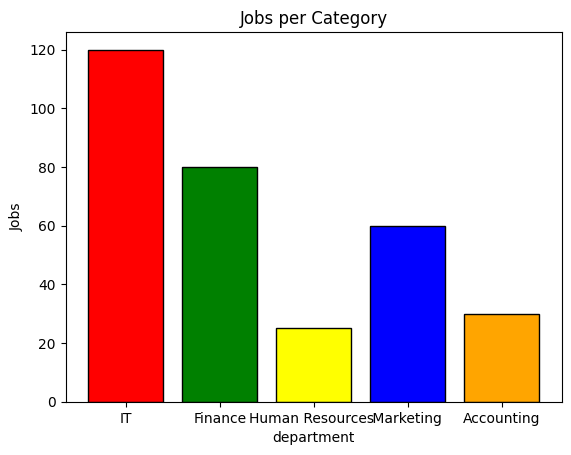

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {'department': ['IT', 'Finance','Human Resources', ' Marketing ','Accounting'],
        'Jobs': [120, 80,25, 60,30,]}
df = pd.DataFrame(data)

sns.barplot(x='department', y='Jobs', data=df)
colors = ["red","green","yellow","blue","orange"]

x = df['department']  # Define x
y = df['Jobs']  # Define y

plt.bar(x, y, color=colors, edgecolor="black")
plt.title('Jobs per Category')
plt.savefig('bar_chart.png')
plt.show()

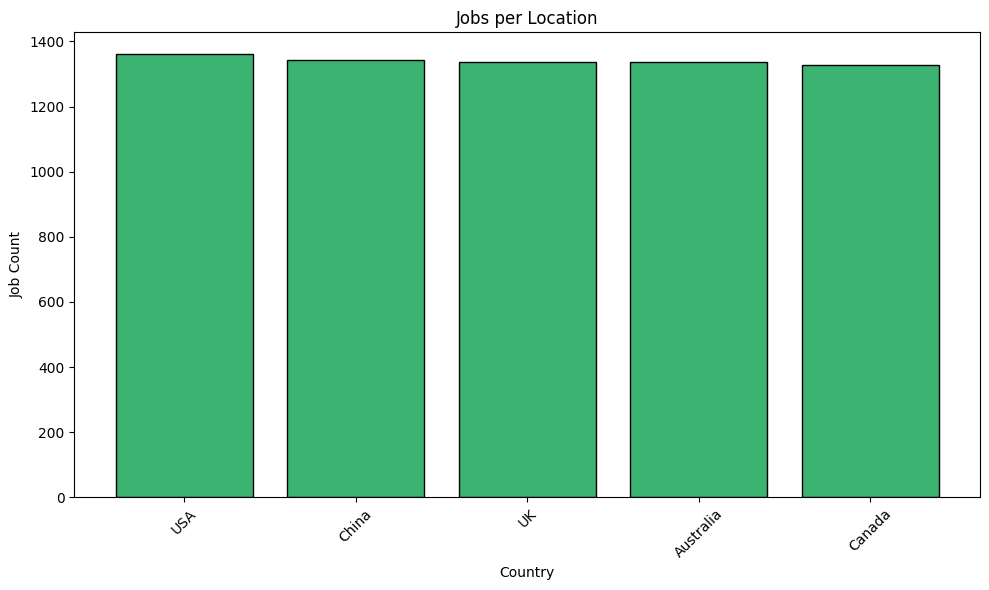

In [33]:
# Load the dataset
data = pd.read_csv("Salary_Data_Based_country_and_race.csv")
df = pd.DataFrame(data)

# Drop rows with missing 'Country' values
df_clean = df.dropna(subset=["Country"])

# Count number of jobs per country
job_counts = df_clean['Country'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(job_counts.index, job_counts.values, color="mediumseagreen", edgecolor="black")
plt.title("Jobs per Location")
plt.xlabel("Country")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Line plots (jobs over time)

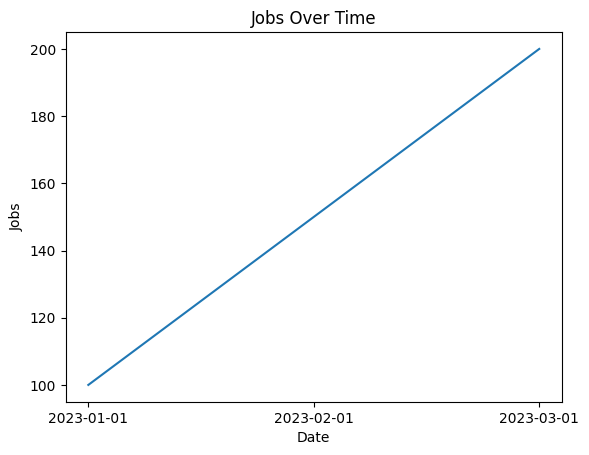

In [28]:
data = {'Date': ['2023-01-01', '2023-02-01', '2023-03-01'],
        'Jobs': [100, 150, 200]}
df = pd.DataFrame(data)

plt.plot(df['Date'], df['Jobs'])
plt.title('Jobs Over Time')
plt.xlabel('Date')
plt.ylabel('Jobs')
plt.savefig('line_plot.png')
plt.show()

3. Pie charts (distribution by location)

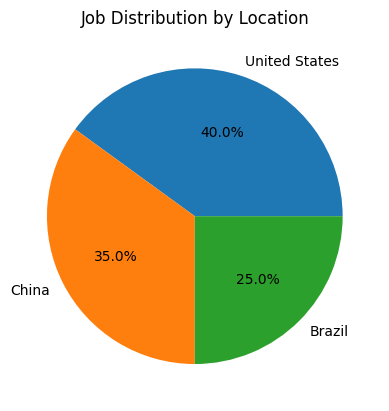

In [29]:
import matplotlib.pyplot as plt

labels = ['United States', 'China', 'Brazil']
sizes = [40, 35, 25]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Job Distribution by Location')
plt.savefig('pie_chart.png')
plt.show()

## Week 4


In [1]:
#CLI Menu Display
def show_menu():
    print("------ Job Analytics CLI Menu ------")
    print("1. View Dataset Summary")
    print("2. Filter by Job Title")
    print("3. Filter by Country")
    print("4. Filter by Salary Range")
    print("5. Export Filtered Data")
    print("6. Exit")


In [11]:
#Define Helper Functions
def view_summary(df):
    print("Total Records:", len(df))
    print("Unique Job Titles:", df['Job Title'].nunique())
    print("Unique Countries:", df['Country'].nunique())
    print("Average Salary:", round(df['Salary'].mean(), 2))

def filter_by_job_title(df):
    job = input("Enter Job Title to filter: ")
    return df[df['Job Title'].str.lower() == job.lower()]

def filter_by_country(df):
    country = input("Enter Country to filter: ")
    return df[df['Country'].str.lower() == country.lower()]

def filter_by_salary_range(df):
    try:
        min_salary = float(input("Enter minimum salary: "))
        max_salary = float(input("Enter maximum salary: "))
        return df[(df['Salary'] >= min_salary) & (df['Salary'] <= max_salary)]
    except ValueError:
        print("Invalid salary input.")
        return df

def export_data(df):
    filename = input("Enter filename to save (e.g., filtered_data.csv): ")
    df.to_csv(filename, index=False)
    print(f"Data exported successfully to '{filename}'")


In [ ]:
# Start CLI loop
df_cli = df.copy()  # Use your loaded DataFrame (already defined in Week 1)

while True:
    show_menu()
    choice = input("Enter your choice (1-6): ")

    if choice == '1':
        view_summary(df_cli)
    elif choice == '2':
        df_cli = filter_by_job_title(df_cli)
        print(df_cli.head())
    elif choice == '3':
        df_cli = filter_by_country(df_cli)
        print(df_cli.head())
    elif choice == '4':
        df_cli = filter_by_salary_range(df_cli)
        print(df_cli.head())
    elif choice == '5':
        export_data(df_cli)
    elif choice == '6':
        print("Exiting CLI. Thank you!")
        break
    else:
        print("Invalid choice. Please select 1-6.")


------ Job Analytics CLI Menu ------
1. View Dataset Summary
2. Filter by Job Title
3. Filter by Country
4. Filter by Salary Range
5. Export Filtered Data
6. Exit


Enter your choice (1-6):  3
Enter Country to filter:  USA


   Unnamed: 0   Age  Gender Education Level          Job Title  \
1           1  28.0  Female        Master's       Data Analyst   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   
5           5  29.0    Male      Bachelor's  Marketing Analyst   
6           6  42.0  Female        Master's    Product Manager   

   Years of Experience    Salary Country      Race  
1                  3.0   65000.0     USA  Hispanic  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  
5                  2.0   55000.0     USA  Hispanic  
6                 12.0  120000.0     USA     Asian  
------ Job Analytics CLI Menu ------
1. View Dataset Summary
2. Filter by Job Title
3. Filter by Country
4. Filter by Salary Range
5. Export Filtered Data
6. Exit


Enter your choice (1-6):  2
Enter Job Title to filter:  Data Analyst


     Unnamed: 0   Age  Gender Education Level     Job Title  \
1             1  28.0  Female        Master's  Data Analyst   
81           81  41.0  Female        Master's  Data Analyst   
386         386  30.0  Female      Bachelor's  Data Analyst   
397         397  27.0    Male      Bachelor's  Data Analyst   
443         443  30.0  Female      Bachelor's  Data Analyst   

     Years of Experience    Salary Country              Race  
1                    3.0   65000.0     USA          Hispanic  
81                  13.0   80000.0     USA             White  
386                  5.0  145000.0     USA  African American  
397                  2.0  110000.0     USA  African American  
443                  5.0  145000.0     USA             White  
------ Job Analytics CLI Menu ------
1. View Dataset Summary
2. Filter by Job Title
3. Filter by Country
4. Filter by Salary Range
5. Export Filtered Data
6. Exit
